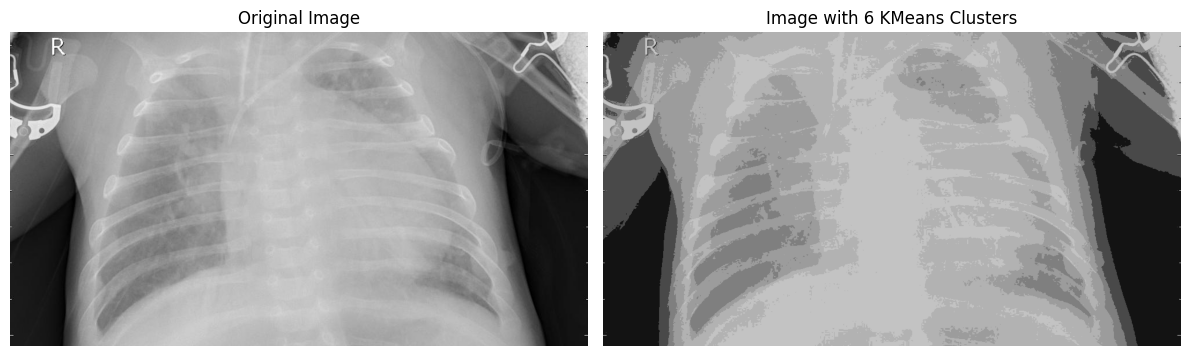

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from PIL import Image

# Load the image
#image_path = 'chest_Xray/test/NORMAL/IM-0001-0001.jpeg'  # Replace with your image path
image_path = 'chest_Xray/test/PNEUMONIA/person1_virus_7.jpeg'  # Replace with your image path
img = Image.open(image_path)
img = img.convert('RGB')  # Ensure it's RGB
img_np = np.array(img)


# Reshape the image to a 2D array of pixels (samples) and 3 color features (R, G, B)
pixels = img_np.reshape(-1, 3)

# Apply KMeans
n_clusters = 6  # You can experiment with this
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
labels = kmeans.fit_predict(pixels)

# Map each pixel to its cluster's color
segmented_img = kmeans.cluster_centers_[labels].reshape(img_np.shape).astype(np.uint8)

# Display original and clustered image
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(segmented_img)
axs[1].set_title(f'Image with {n_clusters} KMeans Clusters')
axs[1].axis('off')

plt.tight_layout()
plt.show()
